![](http://pic1.tsingdataedu.com/%E9%87%8F%E5%8C%96banner.jpg)

# 机器学习策略的归因与回撤时的调整策略
#### \[稀牛学院 x 网易云课程\]《AI量化交易》课程资料 by [老喵]

Boruta是一种特征选择算法。精确地说，它是随机森林周围的一种延伸算法。

### Boruta算法运行的步骤：

1.首先，它通过创建混合副本的所有特征（即阴影特征）为给定的数据集增加了随机性。阴影特征就是把许多打乱后的特征作为新的特征<br>
2.然后，它训练一个随机森林分类的扩展数据集，并计算特征重要性，以评估的每个特征的重要性，越高则意味着越重要。<br>
3.在每次迭代中，它检查一个真实特征是否比最好的阴影特征具有统计显著的更高（低）的重要性（即该特征是否比最大的阴影特征得分更高），如果是，则确认（拒绝）。它会删除它视为拒绝的特征，然后回到第1步。<br>
4.最后，当所有特征得到确认或拒绝，或算法达到随机森林运行的一个规定的限制时，算法停止。

### 重点函数说明
boruta.train\$finalDecision含义是对于每个特征，这个特征是否显著
boruta.train\$ImpHistory含义是对于每个特征，每次迭代的重要性。因此boruta.train\$ImpHistory是个矩阵，这个矩阵的行是每次迭代，列是每个特征的特征名称

In [1]:
install.packages("Boruta")
library(Boruta)

also installing the dependency ‘ranger’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ranger


In [2]:
load("./data/ATST_train_IC.RData")
data_hour_IC=list()
data_hour_IC[[1]]=ATST_train_IC[,c(5,1,34,35,36,12,19,26)]
data_hour_IC[[2]]=ATST_train_IC[,c(6,1,34,35,36,12,13,20,27)]
data_hour_IC[[3]]=ATST_train_IC[,c(7,1,34,35,36,12,13,14,21,28)]
data_hour_IC[[4]]=ATST_train_IC[,c(8,1,34,35,36,12,13,14,15,22,29)]
data_hour_IC[[5]]=ATST_train_IC[,c(9,1,34,35,36,12,13,14,15,16,23,30)]
data_hour_IC[[6]]=ATST_train_IC[,c(10,1,34,35,36,12,13,14,15,16,17,24,31)]
data_hour_IC[[7]]=ATST_train_IC[,c(11,1,34,35,36,12,13,14,15,16,17,18,25,32)]
head(data_hour_IC[[1]])

,R1000,Time,prevClose_prevSettle,prevClose_prevOpen,todayOpen_prevClose,start1000,maxpT1000,minpT1000
2,0.01941739,2007-01-16,0.006537017,0.05069469,0.011509464,0.003219862,0.003403498,-0.004800431
3,-0.01248719,2007-01-17,0.004491443,0.02269978,0.005476843,-0.002361259,0.003159798,-0.005408293
4,0.03707433,2007-01-18,0.005328546,-0.01481897,-0.007226681,-0.004991737,0.012620860,-0.004991737
5,0.01880145,2007-01-19,0.007502478,0.03189753,0.009615887,0.006804702,0.007168518,0.000000000
6,0.02618957,2007-01-22,0.005121043,0.02573409,0.016608802,0.002654057,0.002654057,-0.005073543
7,0.01570678,2007-01-23,0.006499589,0.02891314,0.003721581,-0.017898970,0.000000000,-0.017898970


In [3]:
Fea_Sel<-function(traindata){
  boruta.train=Boruta(CloseR~., data=traindata, doTrace=2)
  boruta.train$finalDecision
  plot(boruta.train,xlab="",xaxt="n")
  lz=lapply(1:ncol(boruta.train$ImpHistory),function(i) boruta.train$ImpHistory[is.finite(boruta.train$ImpHistory[,i]),i])
  names(lz)=colnames(boruta.train$ImpHistory)
  Labels=sort(sapply(lz,median))
  axis(side=1,las=2,labels = names(Labels),at=1:ncol(boruta.train$ImpHistory), cex.axis=0.7)
  return(boruta.train$finalDecision)
}

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
After 10 iterations, +51 secs: 
 confirmed 6 attributes: maxpT1000, minpT1000, prevClose_prevOpen, prevClose_prevSettle, start1000 and 1 more;
 no more attributes left.



prevClose_prevSettle   prevClose_prevOpen  todayOpen_prevClose 
           Confirmed            Confirmed            Confirmed 
           start1000            maxpT1000            minpT1000 
           Confirmed            Confirmed            Confirmed 
Levels: Tentative Confirmed Rejected

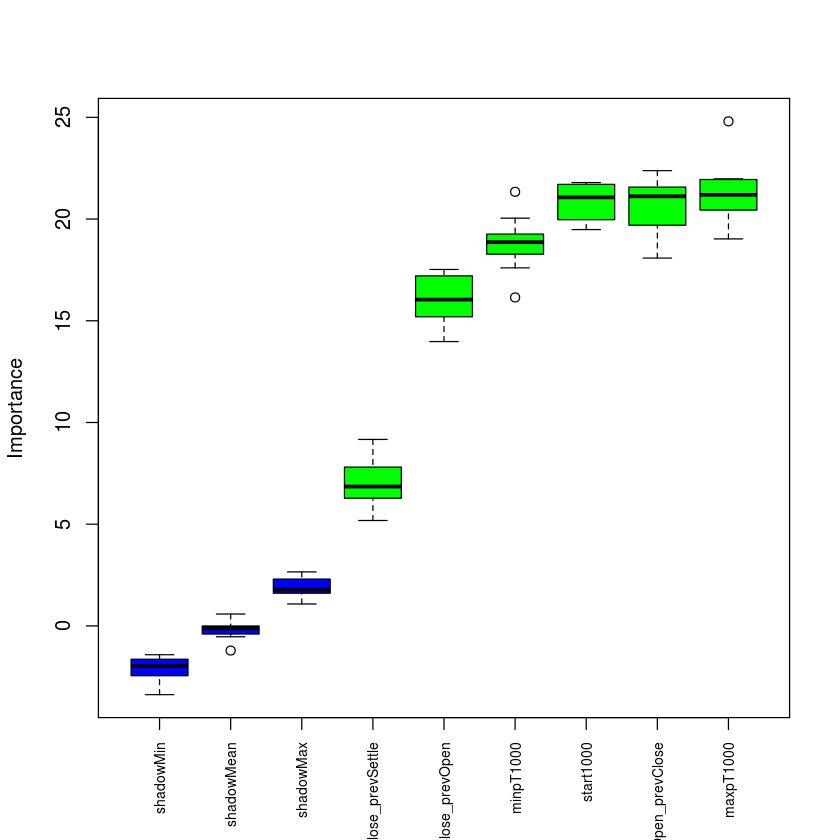

In [4]:
ATAT_train=data_hour_IC[[1]]
names(ATAT_train)[1]='CloseR'
ATAT_train=na.omit(ATAT_train)
Fea_Sel(ATAT_train[,-2])

## 版权归 © 稀牛学院 所有 保留所有权利
![](http://pic1.tsingdataedu.com/%E7%A8%80%E7%89%9B%20x%20%E7%BD%91%E6%98%93.png)